In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt




In [9]:
# Load the dataset
data = pd.read_csv('ai4i2020.csv')

# Select the feature matrix (X) and target variable (y)
X = data.drop(columns=['UDI', 'Type', 'Product ID', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y = data['Machine failure']


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.90      0.63      0.74        68

    accuracy                           0.98      2000
   macro avg       0.94      0.81      0.87      2000
weighted avg       0.98      0.98      0.98      2000

Random Forest ROC-AUC Score: 0.9646358543417366


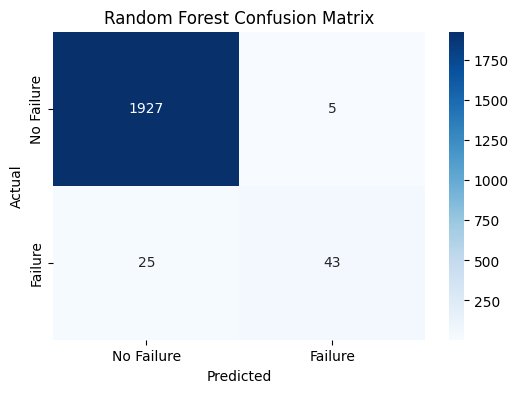

In [10]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Evaluate the Random Forest model
rf_predictions = rf_model.predict(X_test)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))
print("Random Forest ROC-AUC Score:", rf_roc_auc)

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance for Random Forest
feature_importances = rf_model.feature_importances_
features = X.columns


C:\Users\hajim\AppData\Local\Temp\ipykernel_26916\892177385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette='viridis')


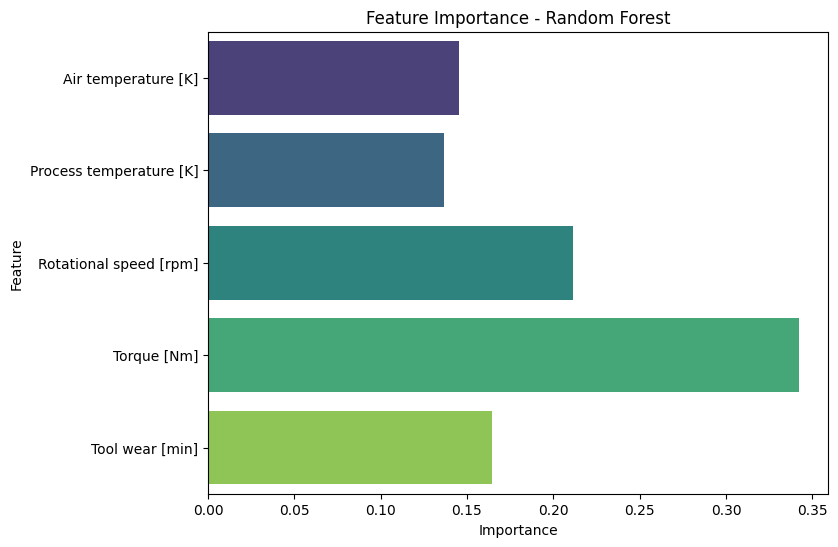

In [11]:
# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [12]:
# Evaluate the SVM model
svm_predictions = svm_model.predict(X_test_scaled)
svm_roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))
print("SVM ROC-AUC Score:", svm_roc_auc)


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1932
           1       0.83      0.22      0.35        68

    accuracy                           0.97      2000
   macro avg       0.90      0.61      0.67      2000
weighted avg       0.97      0.97      0.96      2000

SVM ROC-AUC Score: 0.9563542808427719


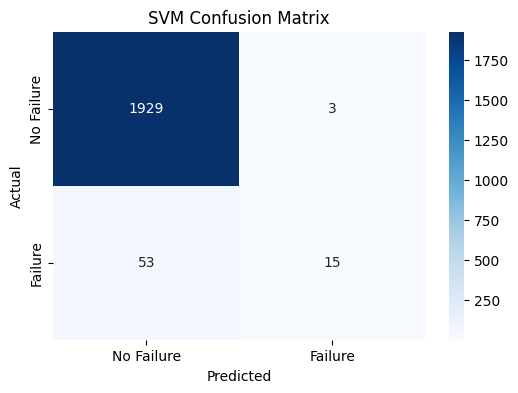

In [13]:
# Plot the confusion matrix for SVM
plt.figure(figsize=(6, 4))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

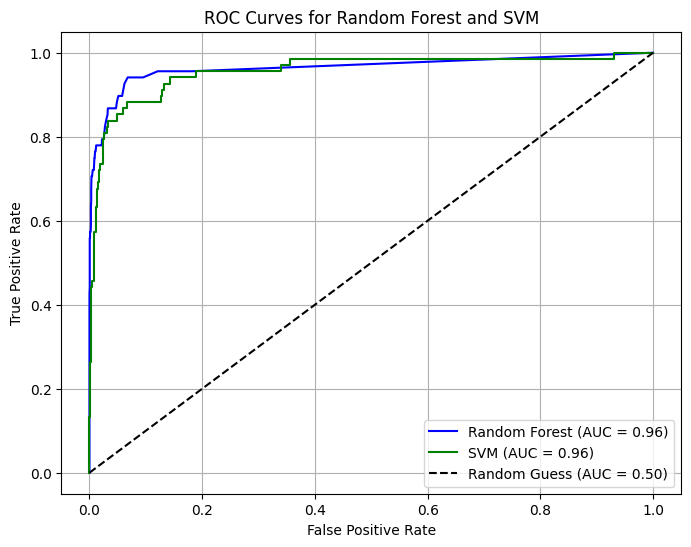

Model Comparison:
            Model  Accuracy   ROC-AUC
0  Random Forest     0.985  0.964636
1            SVM     0.972  0.956354


In [14]:
# Plot ROC Curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_roc_auc:.2f})", color='blue')
plt.plot(svm_fpr, svm_tpr, label=f"SVM (AUC = {svm_roc_auc:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")
plt.title("ROC Curves for Random Forest and SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Compare the results
results = {
    "Model": ["Random Forest", "SVM"],
    "Accuracy": [
        rf_model.score(X_test, y_test),
        svm_model.score(X_test_scaled, y_test)
    ],
    "ROC-AUC": [rf_roc_auc, svm_roc_auc]
}

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("Model Comparison:\n", results_df)
